In [24]:
# Import math and statistics libraries
import numpy as np

# Import data manipulation libraries
import pandas as pd

# Import graphing libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import system libraries
import os, sys
from dotenv import load_dotenv

# Import Polygon.io client for financial data
from polygon import RESTClient

sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from polygon_api import PolygonAPI

In [25]:
# Get the API key from environment variables
load_dotenv()
api_key = os.getenv('POLYGON_API_KEY')

In [26]:
# Tickers from a selection of the S&P 500 companies
tickers = ['AAPL', 'MSFT', 'GOOGL', 'IBM', 'AMZN', 'NVDA',
          'XOM', 'CVX', 'WMT', 'MMM', 'ARE', 'ALLE', 'JPM',
          'V', 'MA', 'PEP', 'CSCO', 'BA', 'ADBE', 'CAT', 
          'BLK', 'INTC', 'NKE', 'MDLZ']

## Intraday price ingest

In [29]:
# if __name__ == '__main__':
#     # Initialize the Polygon API client
#     client = RESTClient(api_key=api_key)
#     client = PolygonAPI()

#     intra_day = client.last_working_day()

#     for i, ticker in enumerate(tickers):
#         # The sink path for the write operation
#         sink_root_path = f'C:/Users/jmtorsvik/git_repos/project-anthill/data/polygon/intraday/{ticker.lower()}/{ticker.lower()}_intraday_{intra_day.replace('-', '_')}.parquet'
        
#         # # Check if the file already exists
#         # if os.path.exists(sink_root_path):
#         #     # print(f"File already exists: {sink_root_path}. Skipping...\n")
#         #     continue # Skip if the file already exists

#         # Fetch intraday data for the ticker
#         print(f"{i+1}/{len(tickers)} - Fetching data for: {ticker}, on {intra_day}")
#         intra_day_ticker = client.fetch_aggs_with_backoff(
#             ticker=ticker, 
#             from_date=intra_day, 
#             to_date=intra_day, 
#             limit=50000,
#             sleep=True
#             )

#         print("Structuring data into a Pandas DataFrame...")
#         df = pd.DataFrame(intra_day_ticker).T

#         print("Saving intraday to parquet file...")
#         df.to_parquet(sink_root_path, index=True)
#         print(f"Data for {ticker} written to {sink_root_path}")
#         print("----------------------------")

## Daily close price ingest

In [16]:
# if __name__ == '__main__':
#     # Initialize the Polygon API client
#     client = RESTClient(api_key=api_key)
#     client = PolygonAPI()

#     to_date = client.last_working_day()    
#     from_date = f"{to_date[:4]}-01-01"

#     for i, ticker in enumerate(tickers):
#         # The sink path for the write operation
#         sink_root_path = f'C:/Users/jmtorsvik/git_repos/project-anthill/data/polygon/daily/{ticker.lower()}/{ticker.lower()}_daily_{from_date[:4]}.parquet'
        
#         # Check if the file already exists
#         if os.path.exists(sink_root_path):
#             # print(f"File already exists: {sink_root_path}. Skipping...\n")
#             continue # Skip if the file already exists

#         # Fetch intraday data for the ticker
#         print(f"{i+1}/{len(tickers)} - Fetching data for: {ticker}, from {from_date} to {to_date}")
#         intra_day_ticker = client.fetch_aggs_with_backoff(
#             ticker=ticker,
#             timespan='day',
#             from_date=from_date, 
#             to_date=to_date,
#             limit=50000,
#             sleep=True
#             )

#         print("Structuring data into a Pandas DataFrame...")
#         df = pd.DataFrame(intra_day_ticker).T

#         print("Saving intraday to parquet file...")
#         df.to_parquet(sink_root_path, index=True)
#         print(f"Data for {ticker} written to {sink_root_path}")
#         print("----------------------------")

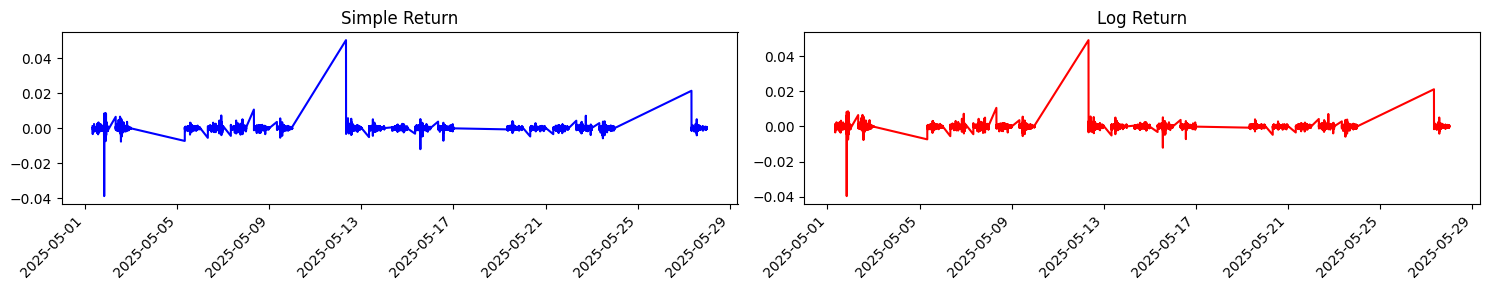

Simple Return: 0.00057 %
Log Return: 0.00052 %


In [17]:
source_path = "~/git_repos/project-anthill/data/polygon/intraday/amzn/"

amzn = pd.read_parquet(source_path)
amzn.sort_index(inplace=True)

amzn['simple_return'] = (amzn['close'] / amzn['close'].shift(1)) - 1
amzn['log_return'] = np.log(amzn['close'] / amzn['close'].shift(1))

fig, axes = plt.subplots(1, 2, figsize=(15, 3), sharex=True)
amzn['simple_return'].plot(ax=axes[0], title='Simple Return', color='blue')
amzn['log_return'].plot(ax=axes[1], title='Log Return', color='red')

for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

print(f"Simple Return: {round(amzn['simple_return'].mean() * 100, 5)} %")
print(f"Log Return: {round(amzn['log_return'].mean() * 100, 5)} %")

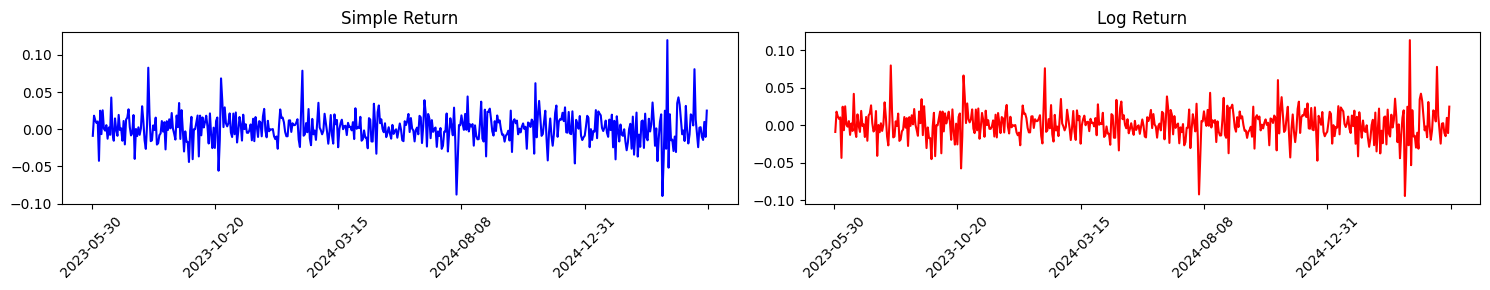

Simple Return: 0.12533 %
Log Return: 0.10556 %


In [18]:
source_path = "~/git_repos/project-anthill/data/polygon/daily/amzn/"

amzn_daily = pd.read_parquet(source_path)
amzn_daily.index = pd.to_datetime(amzn_daily.index).strftime('%Y-%m-%d')
amzn_daily.sort_index(inplace=True)

amzn_daily['simple_return'] = (amzn_daily['close'] / amzn_daily['close'].shift(1)) - 1
amzn_daily['log_return'] = np.log(amzn_daily['close'] / amzn_daily['close'].shift(1))

fig, axes = plt.subplots(1, 2, figsize=(15, 3), sharex=True)
amzn_daily['simple_return'].plot(ax=axes[0], title='Simple Return', color='blue')
amzn_daily['log_return'].plot(ax=axes[1], title='Log Return', color='red')

for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

print(f"Simple Return: {round(amzn_daily['simple_return'].mean() * 100, 5)} %")
print(f"Log Return: {round(amzn_daily['log_return'].mean() * 100, 5)} %")

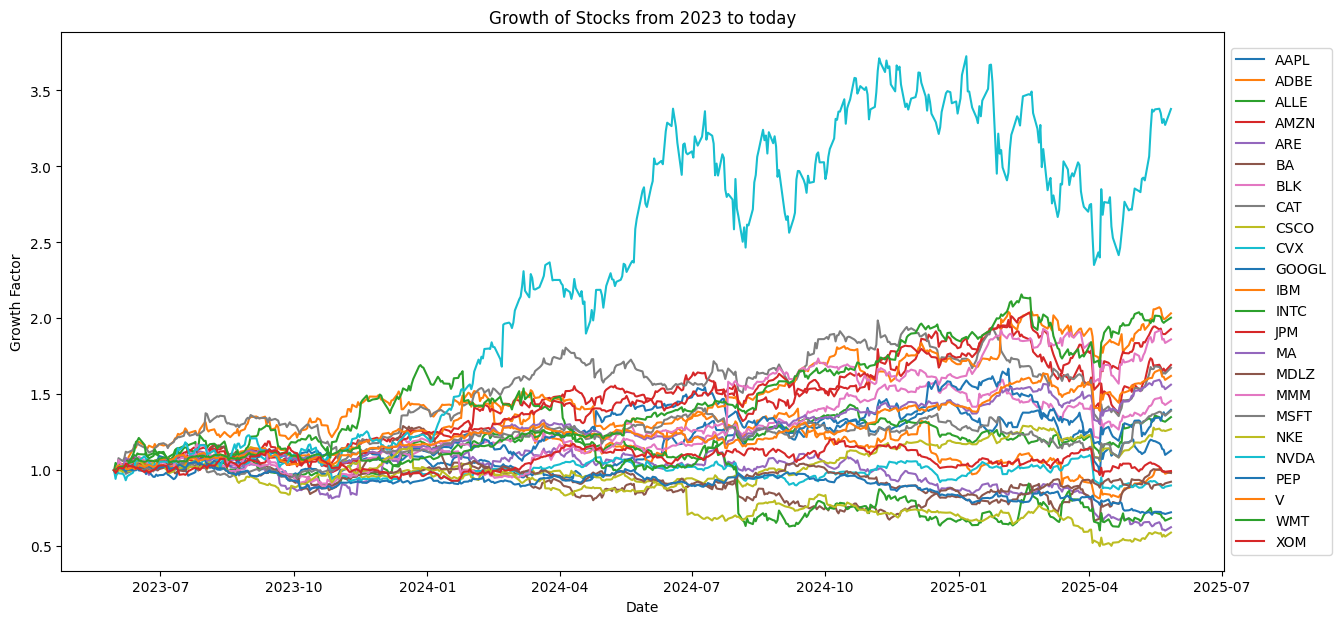

In [19]:
source_daily_path = "~/git_repos/project-anthill/data/polygon/daily/"


df = pd.DataFrame()
simple_returns = pd.DataFrame()

plt.figure(figsize=(15, 7))

for ticker in os.listdir(source_daily_path):
    df[ticker] = pd.read_parquet(source_daily_path + ticker + "/")['close']
    simple_returns[ticker] = (df[ticker] / df[ticker].shift(1)) - 1
    growth = (df[ticker] / df[ticker].iloc[0])
    plt.plot(df.index, growth, label=ticker.upper())

plt.title('Growth of Stocks from 2023 to today')
plt.xlabel('Date')
plt.ylabel('Growth Factor')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

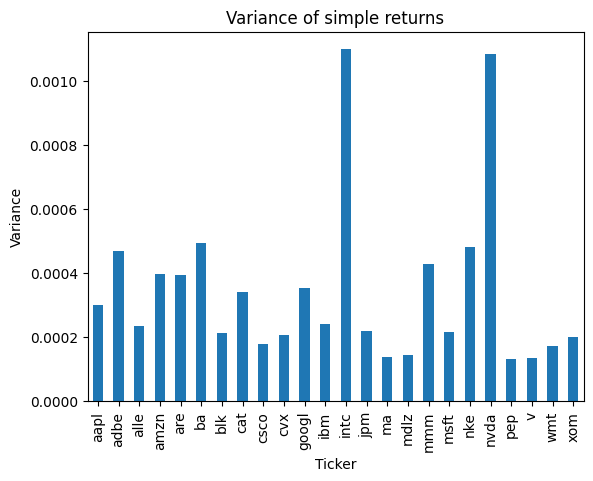

In [20]:
# Calculate variance of returns
simple_returns.var().plot(kind='bar', title='Variance of simple returns')
plt.xlabel('Ticker')
plt.ylabel('Variance')
plt.show()

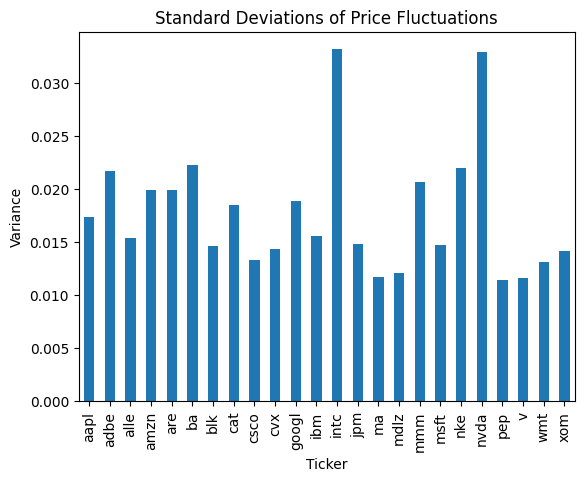

In [21]:
# Calculate the standard deviation of returns
simple_returns.std().plot(kind='bar', title='Standard Deviations of Price Fluctuations')
plt.xlabel('Ticker')
plt.ylabel('Variance')
plt.show()

<Axes: >

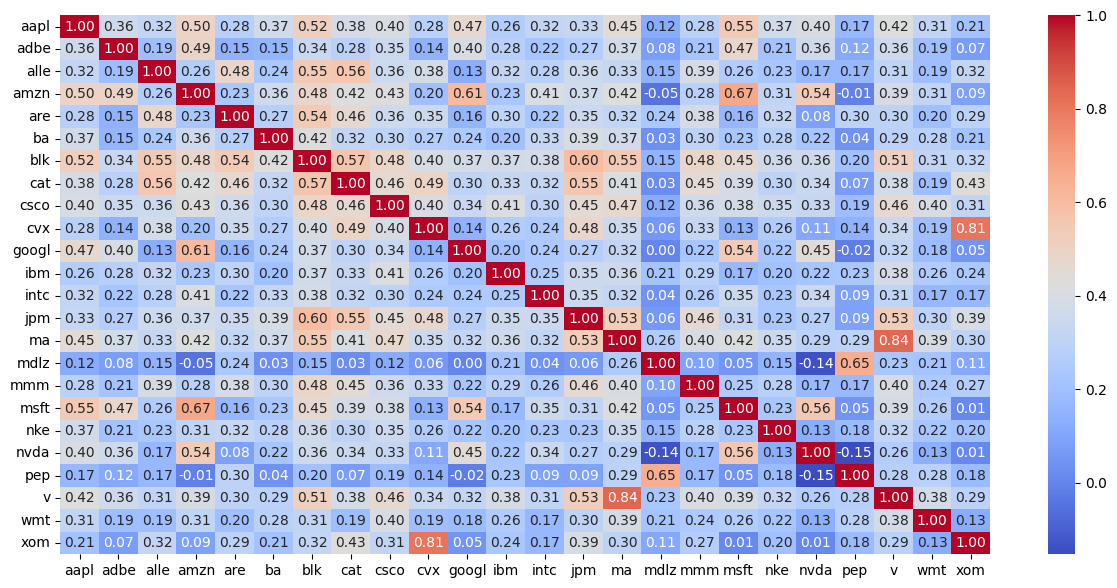

In [23]:
plt.figure(figsize=(15, 7))
sns.heatmap(simple_returns.corr(), annot=True, cmap='coolwarm', fmt='.2f')